# ScikitLearn.jl

https://github.com/cstjean/ScikitLearn.jl

In [2]:
Pkg.add("ScikitLearn")

INFO: Package ScikitLearn is already installed


TO DO: Review the packages 

- GaussianMixtures.jl
- GaussianProcesses.jl
- LowRankModels.jl 

and link notebooks to this one!

# Summary

Scikitlearn.jl wraps around the popular Python package scikit learn (http://scikit-learn.org/stable/index.html) and brings its functionality to Julia as well as wrapping around some Julia packages for machine learning. It provides a nice API for all of those packages and has a high functionality. To find out more about the methods in Python this package wraps around please consult the scikit learn documentation (linked above).

# Details

| Test        | Results       |    
| ------------|:-------------:|
| Package work| Yes |
| Deprecations warnings      | Some      |
| Compatible with JuliaDB | Yes (transformation of tables to arrays required) |
| Contains documentation | Yes (very good!) |
| Simplicity | good |

# Functionality

This package unites a lot of different functionalities. The main functions are listed below (see documentation). The package wraps around Python's scikitlearn packages as well as around some Julia packages. The focus in this notebook will be on the Julia code. 

### Main functions (see "Model API" in the docs)
-----

Not all models implement every function. All input matrices X are vertical
(of shape `(n_sample, n_feature)`).

#### fit!

`fit!(model, X)` ; `fit!(model, X, y)`

Trains `model` on the input data `X` and `y` (for supervised learning) or on
just `X` (for unsupervised learning).  The `model` object is always returned,
allowing code like `classifier = fit!(LogisticRegression(), X, y)`

#### partial_fit!

`partial_fit!(model, X)` ; `partial_fit!(model, X, y)`

Incrementally trains model on the new data `X` and `y`. For instance, this
might perform a stochastic gradient descent step.

#### predict

`predict(model, X)` returns the predicted class of each row in `X` (for
classifiers) or the predicted value (for regressors).

#### predict_proba

`predict_proba(model, X)` returns an `(N, C)` matrix containing the probability
that the n_th sample belongs to the c_th class. Call `get_classes(model)` to
get the ordering of the classes.

#### predict_log_proba

`predict_log_proba(model, X)` is equivalent to `log(predict_proba(model, X))`
but can be more accurate (for small probabilities) and faster (avoiding
the exponential).

#### transform

For unsupervised learning models and for preprocessing, `transform(model, X)`
applies the transformation from `model` to `X`, and returns a similar array
(same number of rows, possibly different number of columns).

#### get_components

For unsupervised learning models, `get_components(model)` returns the matrix of
the latent space, in (n_components, n_features) form. For matrix factorization
methods, this corresponds to the principal components or latent vectors.

#### fit_transform!

`fit_transform!(model, X)` is equivalent to `transform(fit!(model, X), X)` but
can sometimes be more efficient.

#### fit_predict!

`fit_predict!(model, X)` is equivalent to `predict(fit!(model, X), X)` but
can sometimes be more efficient.

#### inverse_transform

`inverse_transform(model, X)` applies the inverse of the model transformation.

#### score_samples

For probabilistic models, `score_samples(model, X)` evaluates the density model
on X.

#### score

`score(model, X)` and `score(model, X, y)` assign a score to how likely `X` or
`y|X` is given the learned model parameters. The higher this score is, the
better the model. This is used for cross-validation.

#### decision_function

`decision_function(model, X)` returns the distance of the samples to the
decision boundary.

### Model Internals

- `clone(model)` returns a new object of the same type as model, with the same
  hyperparameters, but unfit.
- `set_params!(model, param1=value1, param2=value2, ...)` changes the model
  hyperparameters.
- `get_params(model)` returns all the model hyperparameters that can be
  changed with `set_params!`
- `is_classifier(model)` is true if `model` is a classifier.
- `get_feature_names(model)` returns the name of the output features
- `get_classes(model)` returns the label of each class

## Python Models 

Using @sk_import, models from scikit learn (http://scikit-learn.org/stable/) can be imported. This includes 

<ul>
<li> Unsupervised learning models (linear regression, support vector machines, random forest, neural nets, ...) </li>
<li>Unsupervised Learning (clustering, PCA, mixture models, manifold learning, ...)</li>
<li>Dataset Transformation (preprocessing, text feature extraction, one-hot encoding, ...)</li>
</ul>

An example for how to call models from python can be found in the example code.

## Julia Models

#### Linear Regression 

ScikitLearn.jl comes with its own implementation of linear regression in Julia which is optimised for speed. See the demonstration in the examples to learn more. 

### Wrappers around other Julia packages

Scikitlearn.jl wraps around other Julias packages that need to be added manually by the user and then interface with the scikitlearn API. Some packages export a fit! function that conflicts with ScikitLearn's fit!. This can be fixed by adding this line `using ScikitLearn: fit!, predict`.

#### GaussianMixtures.jl

POINT TO REVIEW
#### GaussianProcesses.jl

POINT TO REVIEW
#### DecisionTrees.jl
DecisionTree.jl implements decision tree classification and regression (regression is automatic if targets are float), this imcludes post pruning, random forests (parallelized bagging) and adaptive boosting.

K-fold cross validation is built in for decision trees, forests and adaptive boosting models via nFoldCV_forest(...) etc.

For a more detailed review and example code see https://github.com/dominusmi/warwick-rsg/blob/master/Scouting/DecisionTree.ipynb

#### LowRankModels.jl

POINT TO REVIEW

# Example Code

The github repository has an "examples" folder which contains several very good jupyter notebooks containing example code (https://github.com/cstjean/ScikitLearn.jl/tree/master/examples). The documentation (http://scikitlearnjl.readthedocs.io/en/latest/) is very detailed and contains examples as well and also links to the respective example notebooks. 

Here, we want to show how Python models can be called in Julia and we want to play around with the Scikit Learn linear regression. Examples for the other Julia packages that this package interfaces with can be found in the example notebooks which are linked in the section above. 

### Comparison of linear Regression using two different models (benchmark), plotting cross-validated predictions

Using this example, we demonstrate how models from Python can be called and how well the built in Linear Regression in Julia works. We import the boston dataset (506 instances) which contains data concerning housing in Boston collected by the U.S. Census Service (https://www.kaggle.com/c/boston-housing). The data consists of different features like criminality, age, tax... and the target is the price. We split in test and training data sets and then perform a 10 fold cross validation to predict the class. The code shown here is based on the code shown in the notebook "Plotting Cross-Validated Predictions" in the examples folder of the repository.

In [31]:
using ScikitLearn
using ScikitLearn.CrossValidation: cross_val_predict

@sk_import datasets: load_boston
@sk_import linear_model: LinearRegression
using PyPlot

In [71]:
lr = LinearRegression()
boston = load_boston()
y = boston["target"]

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, boston["data"], y, cv=10);

lrj=ScikitLearn.Models.LinearRegression()
predicted_j = cross_val_predict(lrj, boston["data"], y, cv=10);


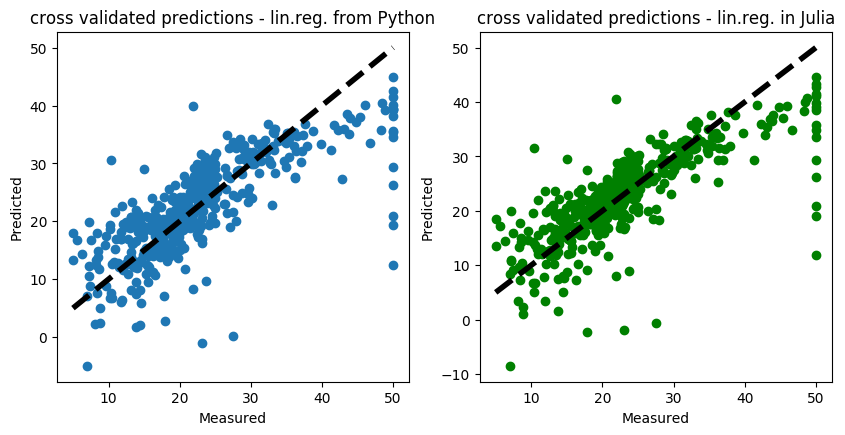

In [72]:
fig = figure("pyplot_subplot_mixed",figsize=(10,10))
subplot(221)
title("cross validated predictions - lin.reg. from Python")
scatter(y, predicted)
plot([minimum(y), maximum(y)], [minimum(y), maximum(y)], "k--", lw=4)
xlabel("Measured")
ylabel("Predicted");
subplot(222)
title("cross validated predictions - lin.reg. in Julia")
scatter(y, predicted_j,color="green")
plot([minimum(y), maximum(y)], [minimum(y), maximum(y)], "k--", lw=4)
xlabel("Measured")
ylabel("Predicted");


We see that the prediction errors are similar for both implementations of linear regression if 10 fold crossvalidation is performed. To do some futher simple benchmarking, we now measure the speed.

In [79]:
@elapsed(cross_val_predict(lr, boston["data"], y, cv=10))  ## using linear regression in python

0.02979066

In [77]:
@elapsed(predicted_j = cross_val_predict(lrj, boston["data"], y, cv=10))  ## using the Julia lin. reg. implementation


0.001249757

This difference in speed seems to be quite big, therefore we want to investiage on a bigger dataset. We import the digits dataset which contains 1797 instances and repeat the speed test.

In [95]:
@sk_import datasets: load_digits
digits = load_digits()
y = digits["target"];

In [96]:
@elapsed(cross_val_predict(lr, digits["data"], y, cv=10))  ## using linear regression in python

0.102391975

In [97]:
@elapsed(predicted_j = cross_val_predict(lrj, digits["data"], y, cv=10))

0.035753912

On the bigger data set the Julia implementation is still significantly faster (if run a second time!). 

## Classifiers in Julia and Python

A very nice way to compare some classifiers implemented in Julia and Python is comparing the visualisations below. They were created using the "comparison" example notebooks in the github repository linked at the top of this notebook. The first picture shows the results of the classification using the Julia packages (indicated in braces), the second one the same data classifed with the wrapper around the Python models. 

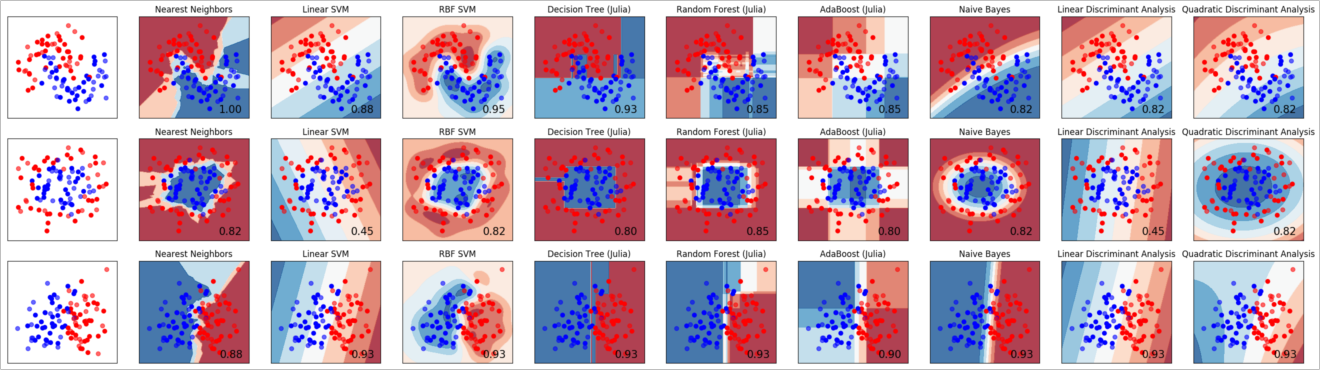

In [11]:
using FileIO
img = load("comparison_julia.png")  #using Julia

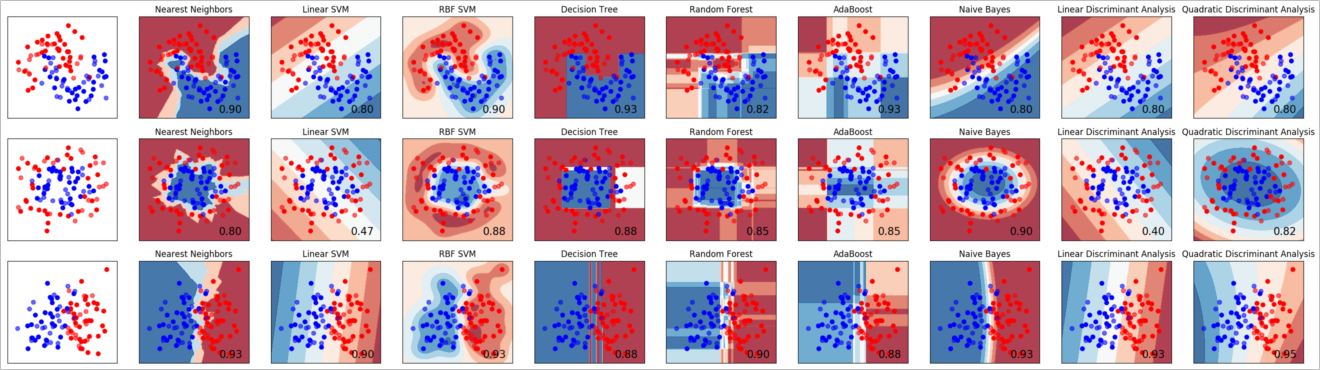

In [12]:
img2=load("comparison_python.png") #using Python wrapper